In [7]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap

import squarify  # For tree map plot
from wordcloud import WordCloud  # For word cloud plot
import numpy as np
from mpl_toolkits.basemap import Basemap



demographics_file = 'm5_survey_data_demographics.csv'
technologies_file = 'm5_survey_data_technologies_normalised.csv'

df_demographics = pd.read_csv(demographics_file)
df_technologies = pd.read_csv(technologies_file)

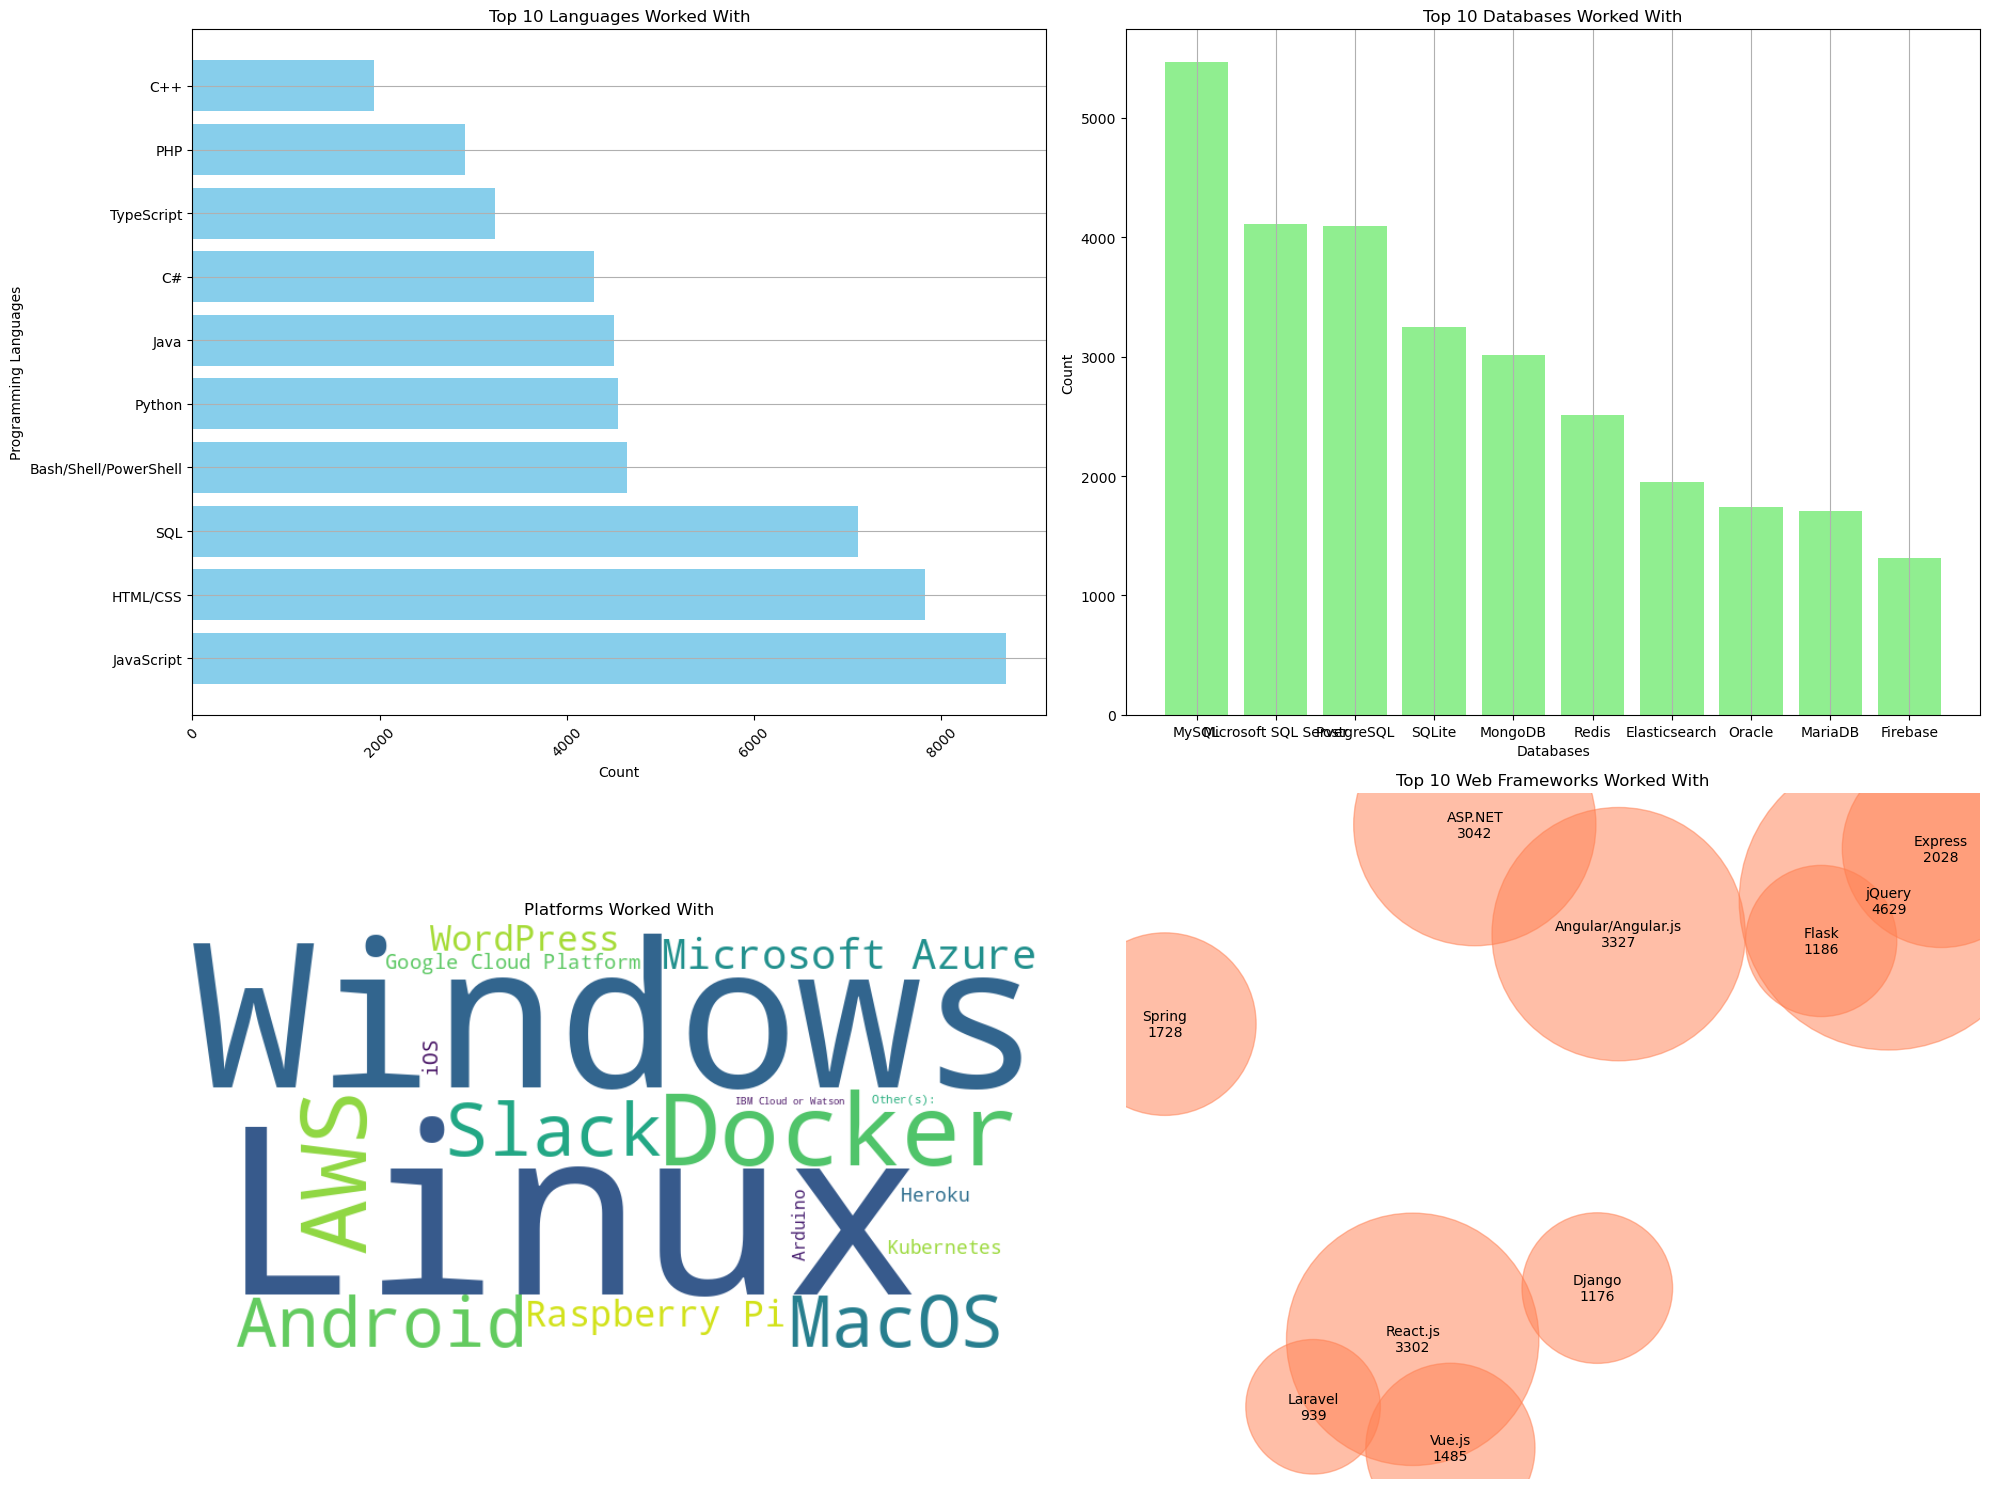

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # For tree map plot
from wordcloud import WordCloud  # For word cloud plot
import numpy as np

# Assuming df_technologies is already defined
df_technologies = pd.read_csv('m5_survey_data_technologies_normalised.csv')

# Top 10 Languages Worked With
top_10_languages = df_technologies['LanguageWorkedWith'].value_counts().head(10)

# Top 10 Databases Worked With
top_10_databases = df_technologies['DatabaseWorkedWith'].value_counts().head(10)

# Platforms Worked With (create a dictionary for WordCloud)
platforms_dict = df_technologies['PlatformWorkedWith'].value_counts().to_dict()

# Top 10 Web Frameworks Worked With
top_10_webframeworks = df_technologies['WebFrameWorkedWith'].value_counts().head(10)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Panel 1: Top 10 Languages Worked With (Bar chart)
axs[0, 0].barh(top_10_languages.index, top_10_languages.values, color='skyblue')
axs[0, 0].set_title('Top 10 Languages Worked With')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Programming Languages')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y')

# Panel 2: Top 10 Databases Worked With (Column chart)
axs[0, 1].bar(top_10_databases.index, top_10_databases.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Databases Worked With')
axs[0, 1].set_xlabel('Databases')
axs[0, 1].set_ylabel('Count')
axs[0, 1].grid(axis='x')

# Panel 3: Platforms Worked With (Word cloud chart)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(platforms_dict)
axs[1, 0].imshow(wordcloud, interpolation='bilinear')
axs[1, 0].set_title('Platforms Worked With')
axs[1, 0].axis('off')

# Panel 4: Top 10 Web Frameworks Worked With (Hierarchy bubble chart)
sizes = top_10_webframeworks.values * 10  # Scale the sizes for better visualization
positions = np.random.rand(len(top_10_webframeworks), 2)  # Random positions for the bubbles

sc = axs[1, 1].scatter(positions[:, 0], positions[:, 1], s=sizes, alpha=0.5, color='coral')

# Annotate bubbles with framework names and values
for i, (framework, value) in enumerate(top_10_webframeworks.items()):
    axs[1, 1].text(positions[i, 0], positions[i, 1], f'{framework}\n{value}', ha='center', va='center', fontsize=10)

axs[1, 1].set_title('Top 10 Web Frameworks Worked With')
axs[1, 1].axis('off')  # Turn off the axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


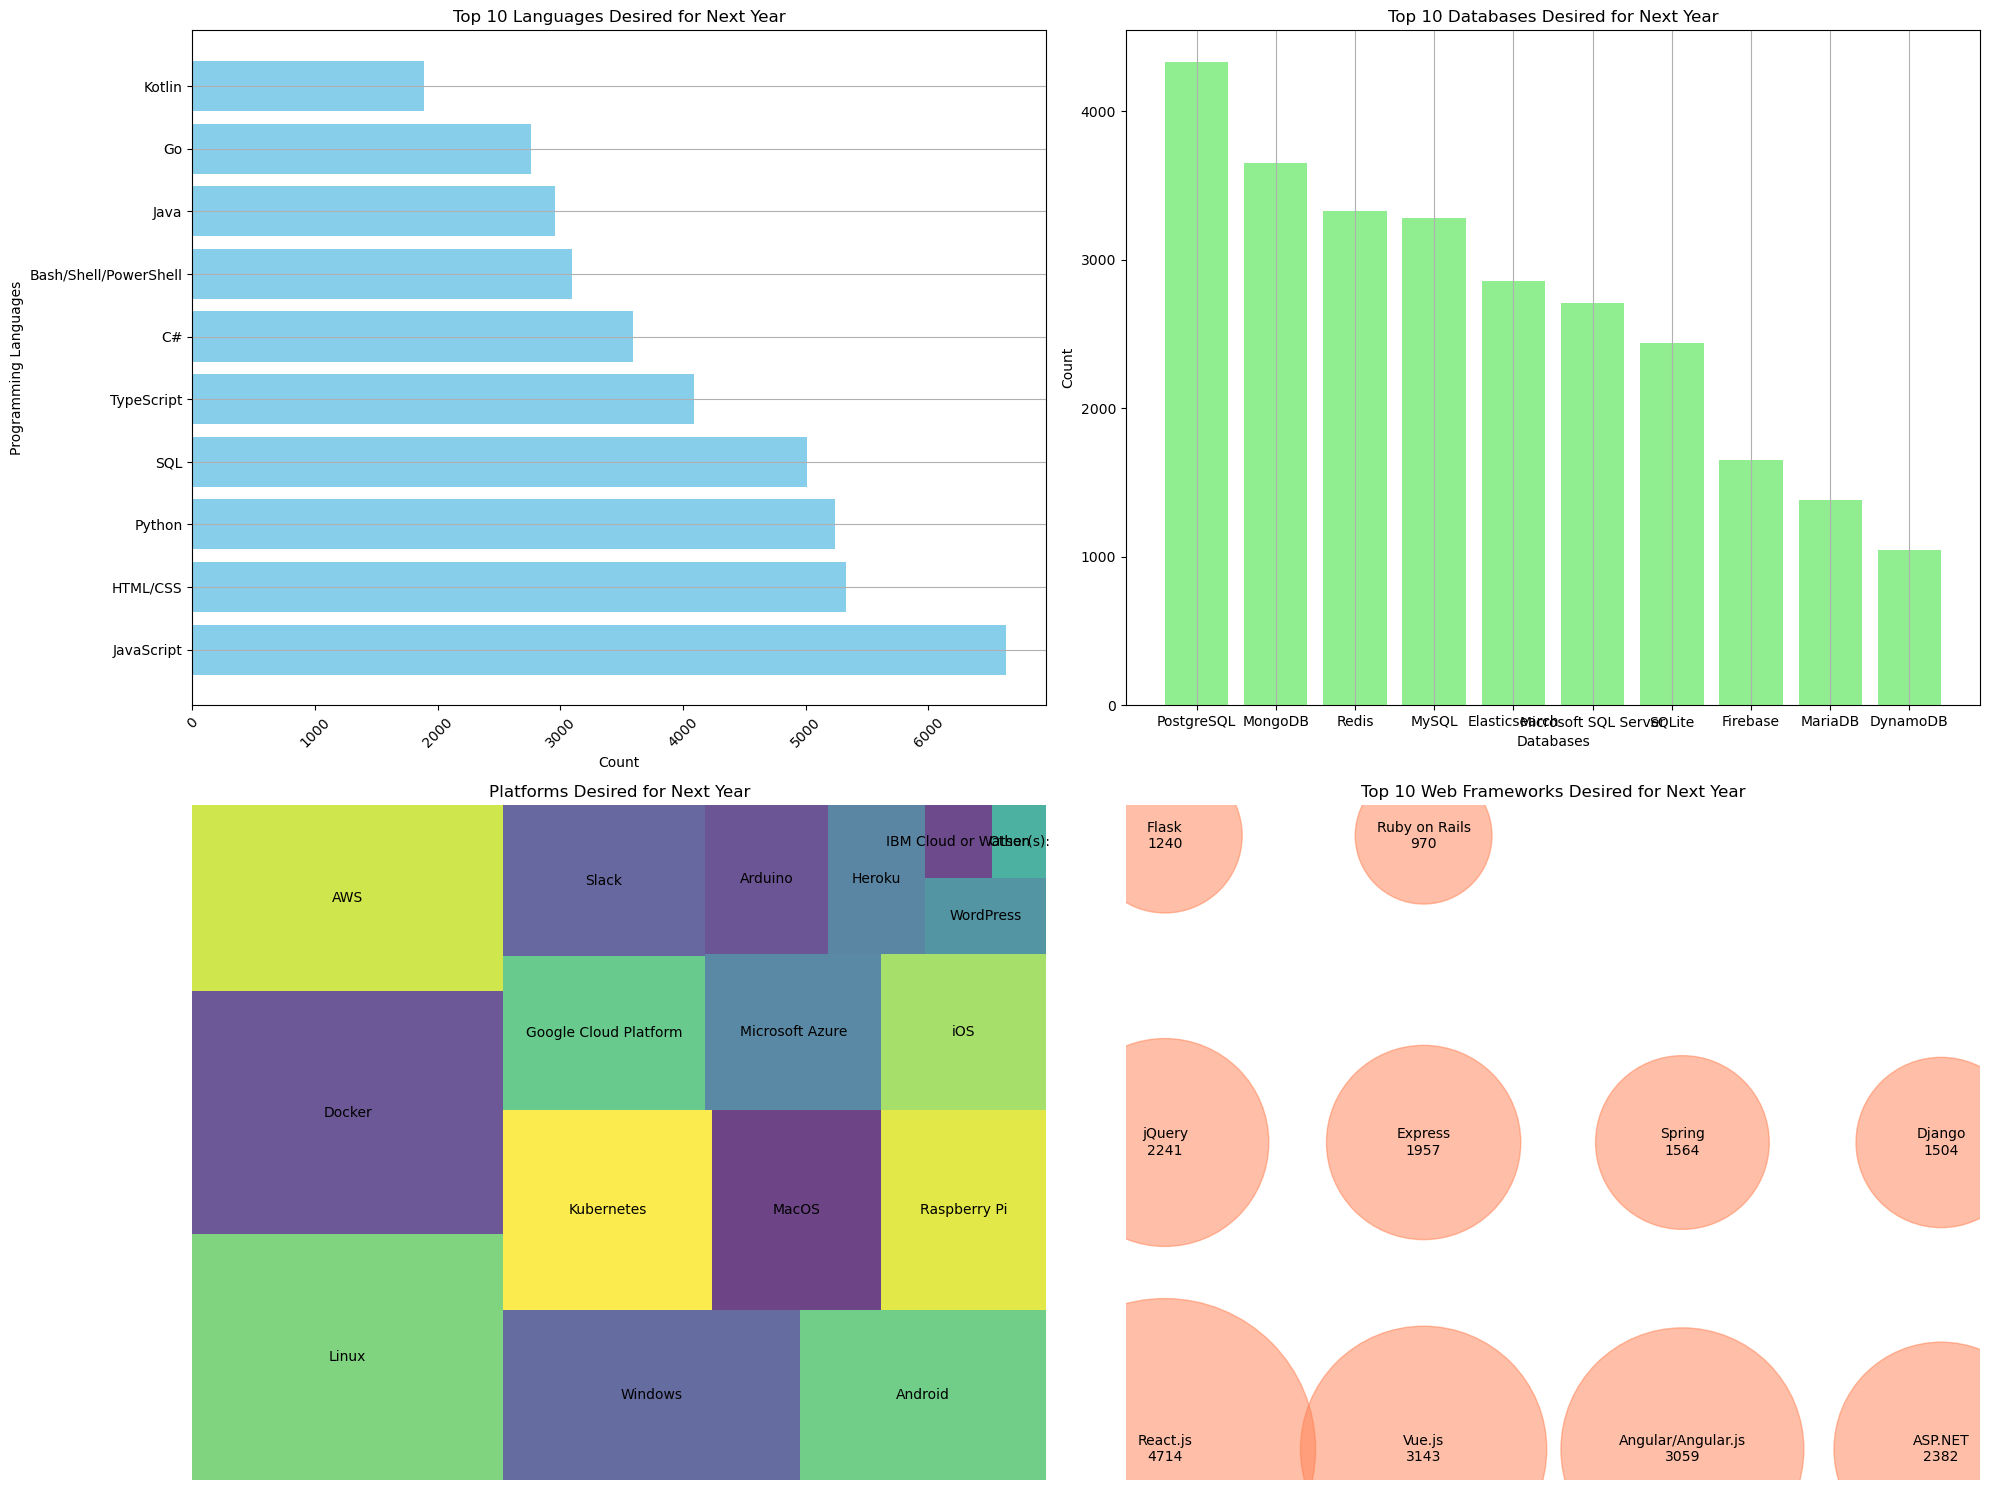

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # For tree map plot
from wordcloud import WordCloud  # For word cloud plot
import numpy as np

# Custom function to position bubbles close together
def generate_positions(n):
    """Generate positions in a grid-like close formation."""
    positions = []
    sqrt_n = int(np.ceil(np.sqrt(n)))  # Calculate the size of the grid
    for i in range(n):
        row = i // sqrt_n
        col = i % sqrt_n
        positions.append((col, row))
    return np.array(positions) / sqrt_n  # Normalize to range [0, 1]

# Assuming df_technologies is already defined
df_technologies = pd.read_csv('m5_survey_data_technologies_normalised.csv')

# Top 10 Languages Desired for Next Year (Bar chart)
top_10_languages_desired_future = df_technologies['LanguageDesireNextYear'].value_counts().head(10)

# Top 10 Databases Desired for Next Year (Column chart)
top_10_databases_desired_future = df_technologies['DatabaseDesireNextYear'].value_counts().head(10)

# Desired Platforms for Next Year (Tree map chart)
platforms_desired_future = df_technologies['PlatformDesireNextYear'].value_counts()

# Top 10 Web Frameworks Desired for Next Year (Hierarchy bubble chart)
top_10_webframeworks_desired_future = df_technologies['WebFrameDesireNextYear'].value_counts().head(10)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# Panel 1: Top 10 Languages Desired for Next Year (Bar chart)
axs[0, 0].barh(top_10_languages_desired_future.index, top_10_languages_desired_future.values, color='skyblue')
axs[0, 0].set_title('Top 10 Languages Desired for Next Year')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Programming Languages')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y')

# Panel 2: Top 10 Databases Desired for Next Year (Column chart)
axs[0, 1].bar(top_10_databases_desired_future.index, top_10_databases_desired_future.values, color='lightgreen')
axs[0, 1].set_title('Top 10 Databases Desired for Next Year')
axs[0, 1].set_xlabel('Databases')
axs[0, 1].set_ylabel('Count')
axs[0, 1].grid(axis='x')

# Panel 3: Desired Platforms for Next Year (Tree map chart)
sizes_future = platforms_desired_future.values
squarify.plot(sizes=sizes_future, label=platforms_desired_future.index, alpha=0.8, ax=axs[1, 0])
axs[1, 0].set_title('Platforms Desired for Next Year')
axs[1, 0].axis('off')

# Panel 4: Top 10 Web Frameworks Desired for Next Year (Hierarchy bubble chart)
sizes = top_10_webframeworks_desired_future.values  * 10 # Scale the sizes for better visualization
positions = generate_positions(len(top_10_webframeworks_desired_future))  # Use the custom function for positions

# Create scatter plot for bubble cloud
sc = axs[1, 1].scatter(positions[:, 0], positions[:, 1], s=sizes, alpha=0.5, color='coral')

# Annotate bubbles with framework names and values
for i, (framework, value) in enumerate(top_10_webframeworks_desired_future.items()):
    axs[1, 1].text(positions[i, 0], positions[i, 1], f'{framework}\n{value}', ha='center', va='center', fontsize=10)

axs[1, 1].set_title('Top 10 Web Frameworks Desired for Next Year')
axs[1, 1].axis('off')  # Turn off the axis

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


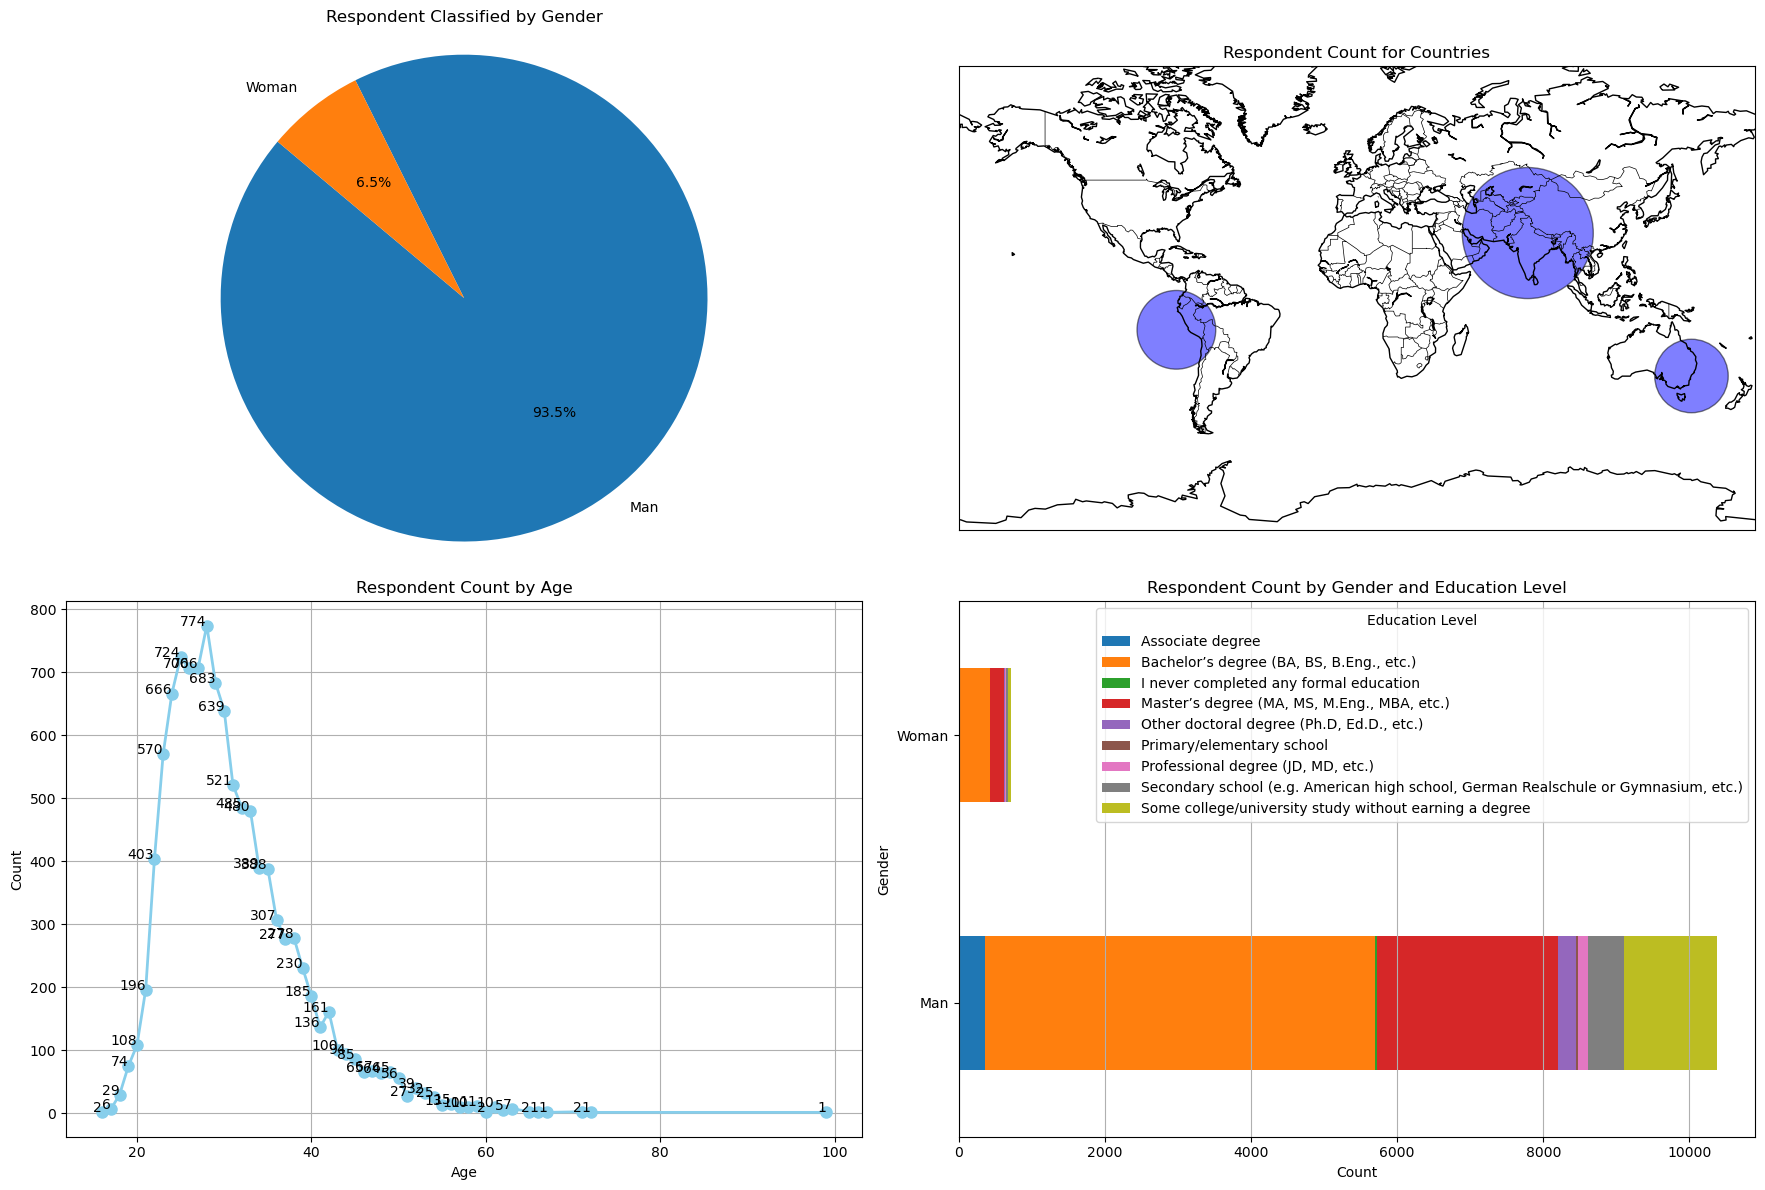

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

# Load your data
demographics_file = 'm5_survey_data_demographics.csv'
df_demographics = pd.read_csv(demographics_file)

# Filter data to include only 'Man' and 'Woman'
df_demographics = df_demographics[df_demographics['Gender'].isin(['Man', 'Woman'])]

# Panel 1: Respondent classified by Gender (Pie chart)
gender_counts = df_demographics['Gender'].value_counts()

# Panel 2: Respondent Count for Countries (Map chart)
# Extract country counts and their corresponding coordinates
country_counts = df_demographics['Country'].value_counts()
# Provide latitude and longitude for each country
country_coords = {
    'USA': (37.77, -122.42),
    'India': (28.61, 77.21),
    'UK': (51.51, -0.13),
    'Brazil': (-14.24, -81.63),
    'Australia': (-33.87, 151.21)
}

# Get latitude, longitude, and size for the map
lats, lons, sizes = [], [], []
for country, count in country_counts.items():
    if country in country_coords:
        lat, lon = country_coords[country]
        lats.append(lat)
        lons.append(lon)
        sizes.append(count * 10)  # Scale size for better visualization

# Panel 3: Respondent Count by Age (Line chart)
age_counts = df_demographics['Age'].value_counts().sort_index()

# Panel 4: Respondent Count by Gender, classified by Formal Education Level (Stacked bar chart)
gender_edu_counts = df_demographics.groupby(['Gender', 'EdLevel']).size().unstack()

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Panel 1: Respondent classified by Gender (Pie chart)
axs[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Respondent Classified by Gender')
axs[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Panel 2: Respondent Count for Countries (Map chart)
axs[0, 1].set_title('Respondent Count for Countries')
m = Basemap(projection='mill', llcrnrlat=-80, urcrnrlat=80,
            llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=axs[0, 1])
m.drawcoastlines()
m.drawcountries()
m.scatter(lons, lats, latlon=True, s=sizes, alpha=0.5, color='blue', edgecolor='k')

# Panel 3: Respondent Count by Age (Line chart)
axs[1, 0].plot(age_counts.index, age_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
axs[1, 0].set_title('Respondent Count by Age')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')
for i, (age, count) in enumerate(age_counts.items()):
    axs[1, 0].text(age, count, str(count), fontsize=10, ha='right')  # Show value labels
axs[1, 0].grid(True)

# Panel 4: Respondent Count by Gender, classified by Formal Education Level (Stacked bar chart)
# Panel 4: Respondent Count by Gender, classified by Formal Education Level (Stacked bar chart)
gender_edu_counts.plot(kind='barh', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Respondent Count by Gender and Education Level')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('Gender')
axs[1, 1].grid(axis='x')
axs[1, 1].legend(title='Education Level')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


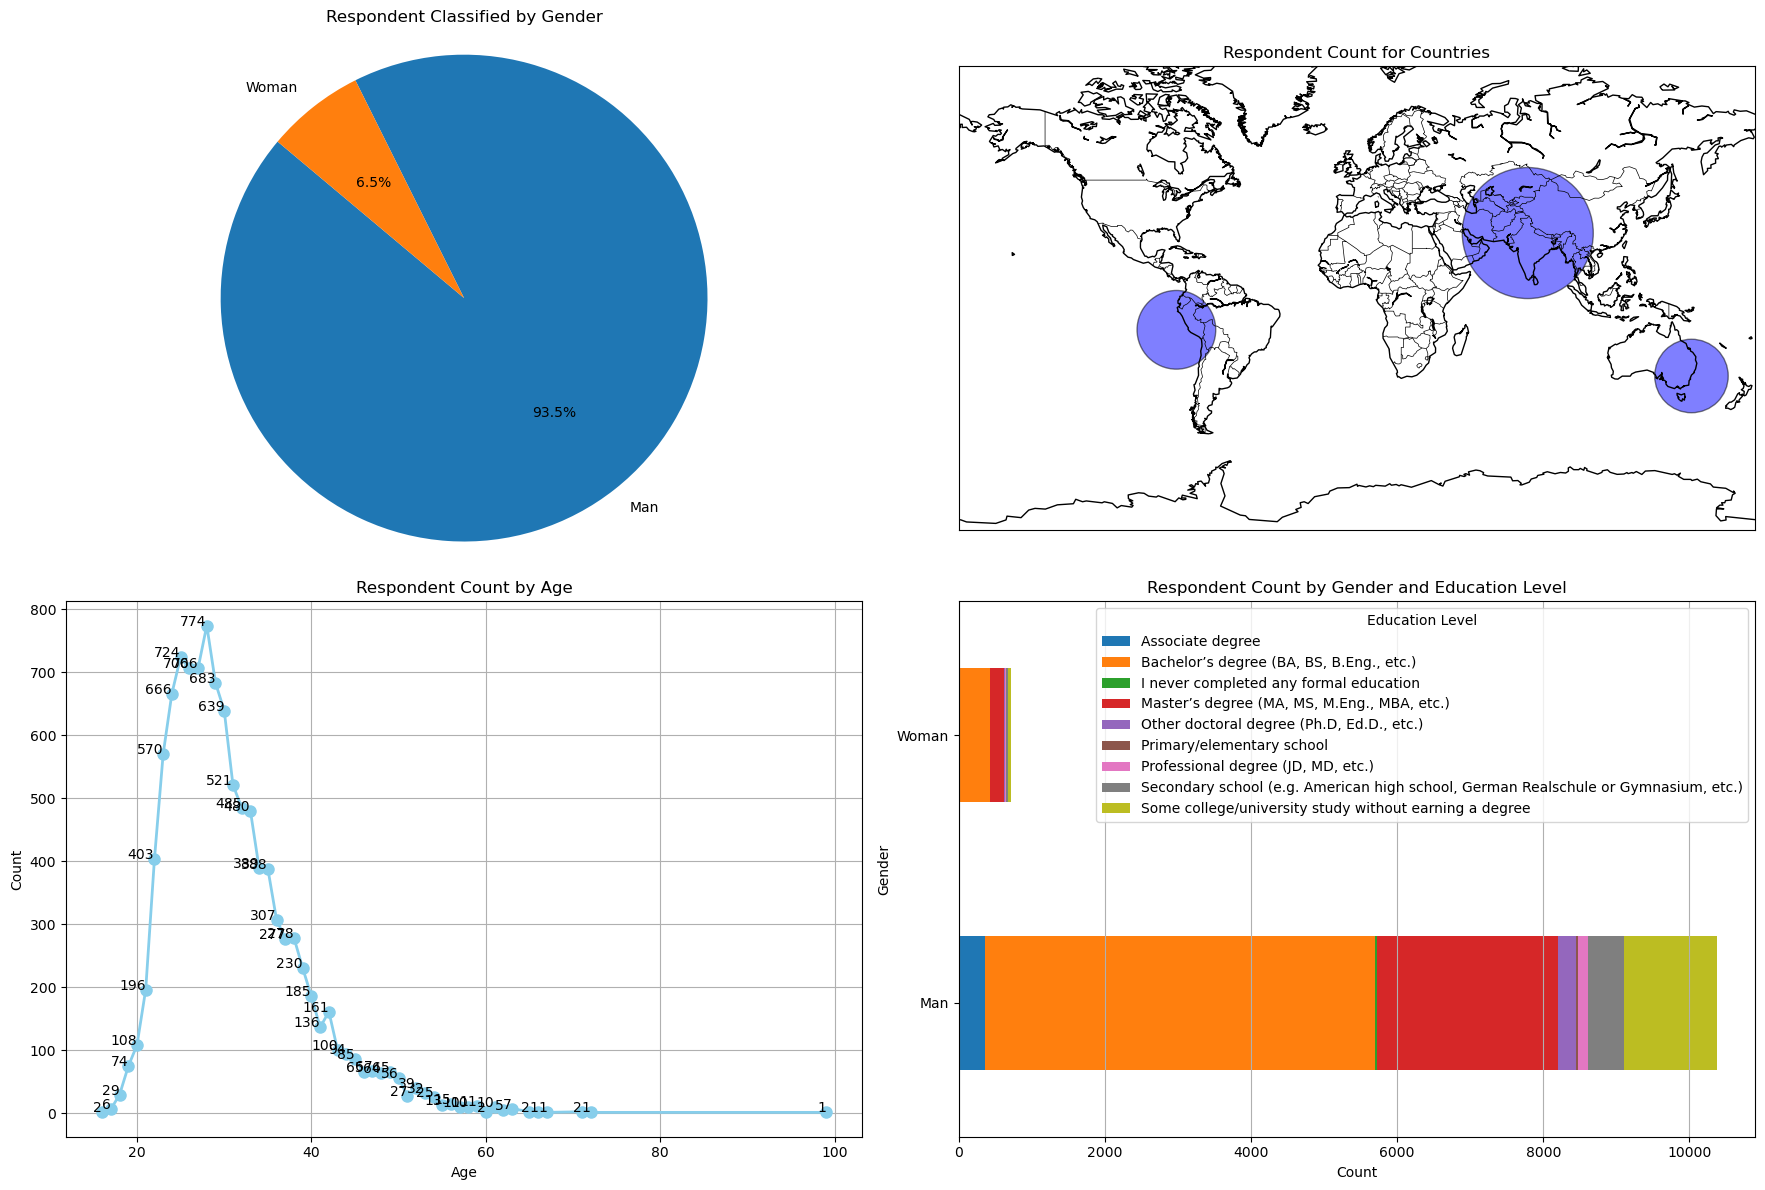